In [4]:
import requests

dtm_link_list = "https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MAP_ES_2012_2015_MDT_URL_LIST.txt"


textstring = requests.get(dtm_link_list).text.splitlines()

print(textstring)

8_787.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_787.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_787.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_788.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_788.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_788.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_789.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_789.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_789.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_790.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_790.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_790.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_791.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_791.img', 

In [5]:
dsm_link_list = "https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MAP_ES_2012_2015_MDE_URL_LIST.txt"


textstring = requests.get(dsm_link_list).text

print(textstring)

ttps://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_785.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.rrd
https://geobases.static.es.gov.br/pu

In [6]:
import subprocess, json

sample_url = "https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img"


def  parseGdalinfoJson(inputpath,print_runstring=False,from_www=True,stats=False,optionals = '',print_outstring=False):
    '''
        Parse GDALINFO from a OGR compliant image as json, it can be web-hosted or no.
    '''

    if stats:
        optionals = '-approx_stats'

    url_preffix = ''

    if from_www:
        url_preffix = '/vsicurl/'

    # if quoted_path:
    #     inputpath = '"'+inputpath+'"'

    runstring = f'gdalinfo "{url_preffix}{inputpath}" -json {optionals}'

    if print_runstring:
        print(runstring)
    
    out = subprocess.run(runstring,shell=True,stdout=subprocess.PIPE)

    as_str = out.stdout.decode('utf-8').replace('\\n','')

    if print_outstring:
        print(as_str)

    as_dict = json.loads(as_str)

    return as_dict


In [7]:
stats_dict_sample = parseGdalinfoJson(sample_url,print_runstring=True,print_outstring=True)

gdalinfo "/vsicurl/https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img" -json 
{
  "description":"\/vsicurl\/https:\/\/geobases.static.es.gov.br\/public\/MAP_ES_2012_2015\/MDE\/39_781.img",
  "driverShortName":"HFA",
  "driverLongName":"Erdas Imagine Images (.img)",
  "files":[
    "\/vsicurl\/https:\/\/geobases.static.es.gov.br\/public\/MAP_ES_2012_2015\/MDE\/39_781.img",
    "\/vsicurl\/https:\/\/geobases.static.es.gov.br\/public\/MAP_ES_2012_2015\/MDE\/39_781.rrd"
  ],
  "size":[
    5002,
    5002
  ],
  "coordinateSystem":{
    "wkt":"BOUNDCRS[    SOURCECRS[        PROJCRS[\"SIRGAS_2000_UTM_Zone_24S\",            BASEGEOGCRS[\"SIRGAS_2000\",                DATUM[\"Sistema de Referencia Geocentrico para las AmericaS 2000\",                    ELLIPSOID[\"GRS_1980\",6378137,298.257222101004,                        LENGTHUNIT[\"metre\",1]],                    ID[\"EPSG\",6674]],                PRIMEM[\"Greenwich\",0,                    ANGLEUNIT[\"degree\",0.0174

In [8]:
pol_as_list = stats_dict_sample['wgs84Extent']['coordinates'][0]
print(pol_as_list)

[[-40.0502443, -19.8027731], [-40.050839, -19.8931624], [-39.9552822, -19.8937009], [-39.9547415, -19.803309], [-40.0502443, -19.8027731]]


In [9]:
from shapely.geometry import Polygon

In [10]:
sample_pol = Polygon(pol_as_list)

print(sample_pol)

POLYGON ((-40.0502443 -19.8027731, -40.050839 -19.8931624, -39.9552822 -19.8937009, -39.9547415 -19.803309, -40.0502443 -19.8027731))


In [23]:
import numpy as np

pol_as_np = np.array(pol_as_list) + 0.1

pol_as_np2 = np.array(pol_as_list) + 0.15

print(pol_as_np)
print(pol_as_np2)

[[-39.9502443 -19.7027731]
 [-39.950839  -19.7931624]
 [-39.8552822 -19.7937009]
 [-39.8547415 -19.703309 ]
 [-39.9502443 -19.7027731]]
[[-39.9002443 -19.6527731]
 [-39.900839  -19.7431624]
 [-39.8052822 -19.7437009]
 [-39.8047415 -19.653309 ]
 [-39.9002443 -19.6527731]]


In [24]:
sample_pol2 = Polygon(pol_as_np)

print(sample_pol2)

sample_pol3 = Polygon(pol_as_np2)

print(sample_pol3)

POLYGON ((-39.9502443 -19.7027731, -39.950839 -19.7931624, -39.8552822 -19.7937009, -39.8547415 -19.703309, -39.9502443 -19.7027731))
POLYGON ((-39.9002443 -19.6527731, -39.900839 -19.7431624, -39.8052822 -19.7437009, -39.8047415 -19.653309, -39.9002443 -19.6527731))


In [15]:
print(sample_url)

https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img


In [16]:
import wget

wget.download(sample_url,'sample_img.img')

'sample_img.img'

In [17]:
import os
from urllib.parse import urlparse

a = urlparse(sample_url)
print(a.path)                    
print(os.path.basename(a.path))  

b = urlparse(sample_url).path


/public/MAP_ES_2012_2015/MDE/39_781.img
39_781.img


In [18]:
print(textstring)

ttps://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_785.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.rrd
https://geobases.static.es.gov.br/pu

In [19]:
print(sample_url)

https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img


  url                                           geometry
0   h  POLYGON ((-40.05024 -19.80277, -40.05084 -19.8...
1   t  POLYGON ((-39.95024 -19.70277, -39.95084 -19.7...
2   t  POLYGON ((-39.90024 -19.65277, -39.90084 -19.7...


<AxesSubplot:>

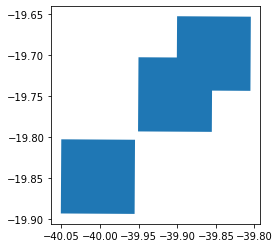

In [25]:
from geopandas import GeoDataFrame

# HERE FOR GEODATAFRAME

data = {'url':[textstring[0],textstring[1],textstring[2],],'geometry':[sample_pol,sample_pol2,sample_pol3,]}

sample_gdf = GeoDataFrame(data,crs="EPSG:4326")

print(sample_gdf)

sample_gdf.plot()